In [1]:
# Carry out the deep neural network on the CIFAR10 image dataset

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Machine learning libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Deep learning libraries
import tensorflow as tf
from tensorflow import keras

# Import the CIFAR10 image dataset
cifar_10 = keras.datasets.cifar10

In [29]:
# Part a: Build the DNN
model = tf.keras.Sequential()
# An input layer
model.add(tf.keras.layers.Flatten(input_shape = [32, 32,3]))
# Hidden layers
for i in range(1,20 + 1):
    model.add(tf.keras.layers.Dense(100, kernel_initializer = 'he_normal', activation='elu'))
# An output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Part b: 
# load the data
(X_train_full, y_train_full), (X_test, y_test) = cifar_10.load_data()
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Compile the model
optimizer_Nadam = tf.keras.optimizers.Nadam(learning_rate=1e-2, beta_1=0.9, beta_2=0.999, epsilon=1e-10, name='Nadam')
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer_Nadam, metrics = ['accuracy'])




In [27]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min',patience=5)
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid), callbacks=[es])




Epoch 1/40
1407/1407 [==============================] - 6s 4ms/step - loss: 1.7033 - accuracy: 0.3864 - val_loss: 1.7048 - val_accuracy: 0.3830
Epoch 2/40
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6092 - accuracy: 0.4209 - val_loss: 1.6963 - val_accuracy: 0.3888
Epoch 3/40
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5496 - accuracy: 0.4409 - val_loss: 1.5917 - val_accuracy: 0.4210
Epoch 4/40
1407/1407 [==============================] - 6s 4ms/step - loss: 1.4973 - accuracy: 0.4596 - val_loss: 1.5208 - val_accuracy: 0.4512
Epoch 5/40
1407/1407 [==============================] - 7s 5ms/step - loss: 1.4662 - accuracy: 0.4720 - val_loss: 1.5805 - val_accuracy: 0.4350
Epoch 6/40
1407/1407 [==============================] - 7s 5ms/step - loss: 1.4302 - accuracy: 0.4849 - val_loss: 1.5387 - val_accuracy: 0.4442
Epoch 7/40
1407/1407 [==============================] - 7s 5ms/step - loss: 1.4009 - accuracy: 0.4977 - val_loss: 1.5153 - val_accuracy:

Epoch 1/5
1407/1407 [==============================] - 20s 10ms/step - loss: 2.0367 - accuracy: 0.2336 - val_loss: 2.2642 - val_accuracy: 0.2672
Epoch 2/5
1407/1407 [==============================] - 14s 10ms/step - loss: 1.9177 - accuracy: 0.2803 - val_loss: 2.4108 - val_accuracy: 0.1894
Epoch 3/5
1407/1407 [==============================] - 18s 13ms/step - loss: 1.8869 - accuracy: 0.2905 - val_loss: 2.4327 - val_accuracy: 0.2004
Epoch 4/5
1407/1407 [==============================] - 21s 15ms/step - loss: 1.8714 - accuracy: 0.3014 - val_loss: 2.1766 - val_accuracy: 0.2686
Epoch 5/5
1407/1407 [==============================] - 23s 16ms/step - loss: 1.8097 - accuracy: 0.3292 - val_loss: 2.7523 - val_accuracy: 0.2202


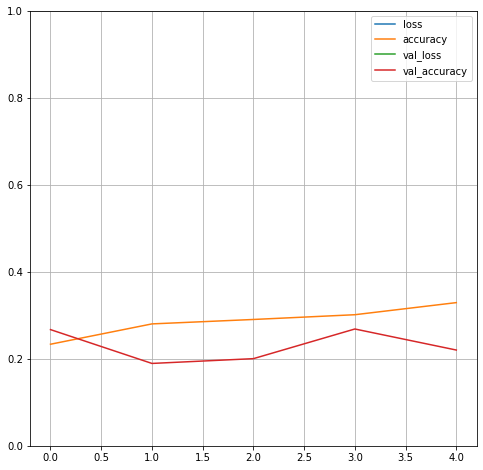

In [32]:
# Part c: Try batch normalization
model2 = tf.keras.Sequential()
# An input layer
model2.add(tf.keras.layers.Flatten(input_shape = [32, 32, 3]))
# Hidden layers
for i in range(1,20 + 1):
    model2.add(tf.keras.layers.Dense(100, kernel_initializer = 'he_normal', activation='elu'))
    model2.add(tf.keras.layers.BatchNormalization())
# An output layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model
model2.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer_Nadam, metrics = ['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid), callbacks=[es])

# Plot the graph
pd.DataFrame(history2.history).plot(figsize=(8,8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()